In [12]:
import rasterio as rio

B2 = rio.open('../img/T21JUL_20240719T135701_B02_10m.tif')


In [21]:
from pyproj import Transformer

env_size = (B2.height, B2.width)
print('env_size:', env_size)
print('B2.shape:', B2.shape)
print('B2.count:', B2.count)
print('B2.crs:', B2.crs)

utm_epsg_code = B2.crs
wgs84_epsg_code = 'EPSG:4326'  # WGS84（緯度経度）に変換

transformer = Transformer.from_crs(utm_epsg_code, wgs84_epsg_code, always_xy=True)

# 緯度経度
height, width = B2.height, B2.width

# ピクセル座標を緯度経度に変換
# 四隅の座標を取得
corners = [
		B2.xy(0, 0),               # 左上
		B2.xy(0, width - 1),       # 右上
		B2.xy(height - 1, 0),      # 左下
		B2.xy(height - 1, width - 1)  # 右下
]

# 結果を表示
for i, (x, y) in enumerate(corners):
		longitude, latitude = transformer.transform(x, y)
		print(f"Corner {i+1}: Latitude, Longitude: ({latitude}, {longitude})")

env_size: (10980, 10980)
B2.shape: (10980, 10980)
B2.count: 1
B2.crs: EPSG:32721
Corner 1: Latitude, Longitude: (-26.20549929717919, -59.00164357909627)
Corner 2: Latitude, Longitude: (-26.21659717340129, -57.902989378664756)
Corner 3: Latitude, Longitude: (-27.196177881203653, -59.01904082888667)
Corner 4: Latitude, Longitude: (-27.207762175181088, -57.910842850169374)


In [22]:
# 緯度軽度をピクセル座標に変換する関数
def latlon_to_pixel(lat, lon, raster):
		transformer = Transformer.from_crs('EPSG:4326', raster.crs, always_xy=True)
		x, y = transformer.transform(lon, lat)
		row, col = raster.index(x, y)
		return row, col

Latitude, Longitude: (-27.135989, -58.111153) -> Pixel: (10200, 8988)


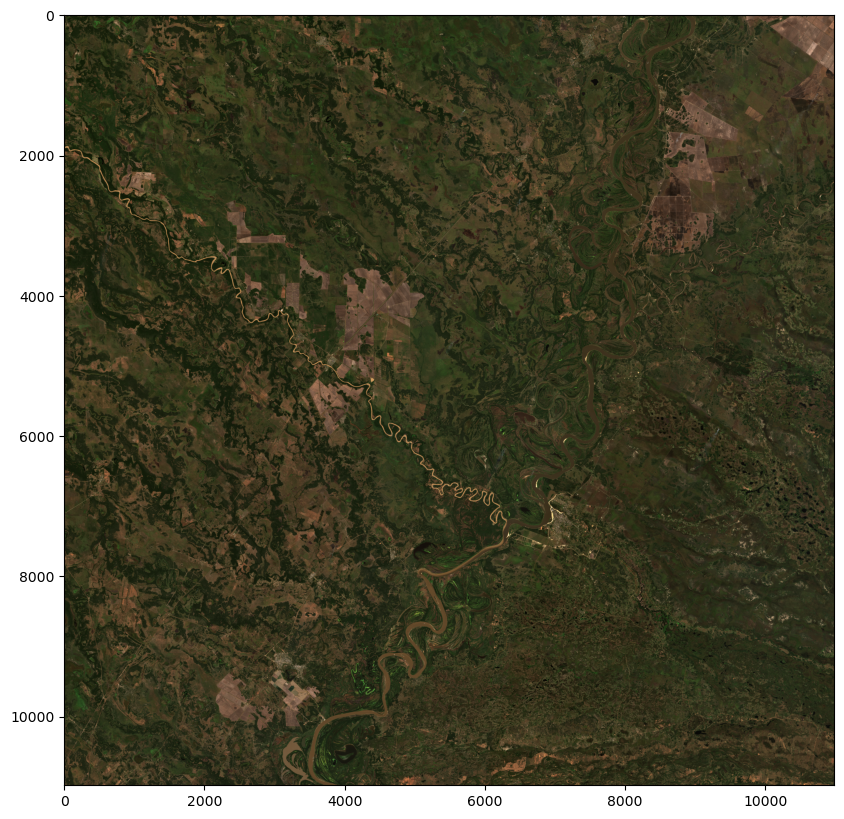

In [30]:
lon, lat = -58.111153, -27.135989
row, col = latlon_to_pixel(lat, lon, B2)
print(f"Latitude, Longitude: ({lat}, {lon}) -> Pixel: ({row}, {col})")


TCI = rio.open('../img/T21JUL_20240719T135701_TCI_10m.tif')

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(TCI.read([1, 2, 3]).transpose(1, 2, 0))
# row, colの位置を薄く大きくプロット
# plt.scatter(col, row, color='red', s=100)



In [4]:
import numpy as np
B2 = B2.read().transpose([1,2,0]).astype('float')
print(f"Max of sat: {np.max(B2)}")
print(f"Min of sat: {np.min(B2)}")

Max of sat: 19568.0
Min of sat: 0.0


In [5]:
import matplotlib.pyplot as plt

def rgb_plot(rgb_data, title=None):
    plt.figure(figsize=(10, 8))
    img = plt.imshow(rgb_data)
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()


/home/saiga/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


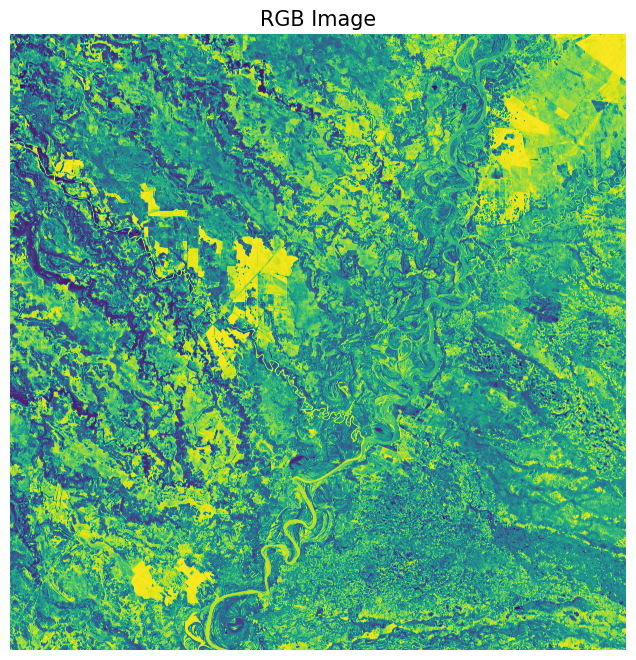

In [10]:
from skimage import exposure
# 正規化
B2_norm = (B2 - np.min(B2)) / (np.max(B2) - np.min(B2))
equalized_array = exposure.equalize_hist(B2_norm)
rgb_plot(equalized_array, title='RGB Image')